In [33]:
import pandas as pd
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.drop(columns=["Name", "Ticket"], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Dataset has 891 entries and 10 columns.

Columns like Age, Cabin, Embarked have missing values.

Sex, Cabin, and Embarked are categorical (object type).

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders[col] = le

Label Encoding is used to convert string columns (Sex, Cabin, Embarked) into numeric format for correlation and visualization.

In [37]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


Average passenger age is ~29.7 years.

Survival rate is ~38% (Survived mean = 0.38).

Fare prices vary greatly (min $0 to max $512).

Most passengers traveled in 3rd class (Pclass mode = 3).

In [38]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

549 passengers did not survive (0).

342 passengers survived (1).

Death rate is higher (~61.7%).

In [39]:
import warnings
warnings.filterwarnings('ignore')

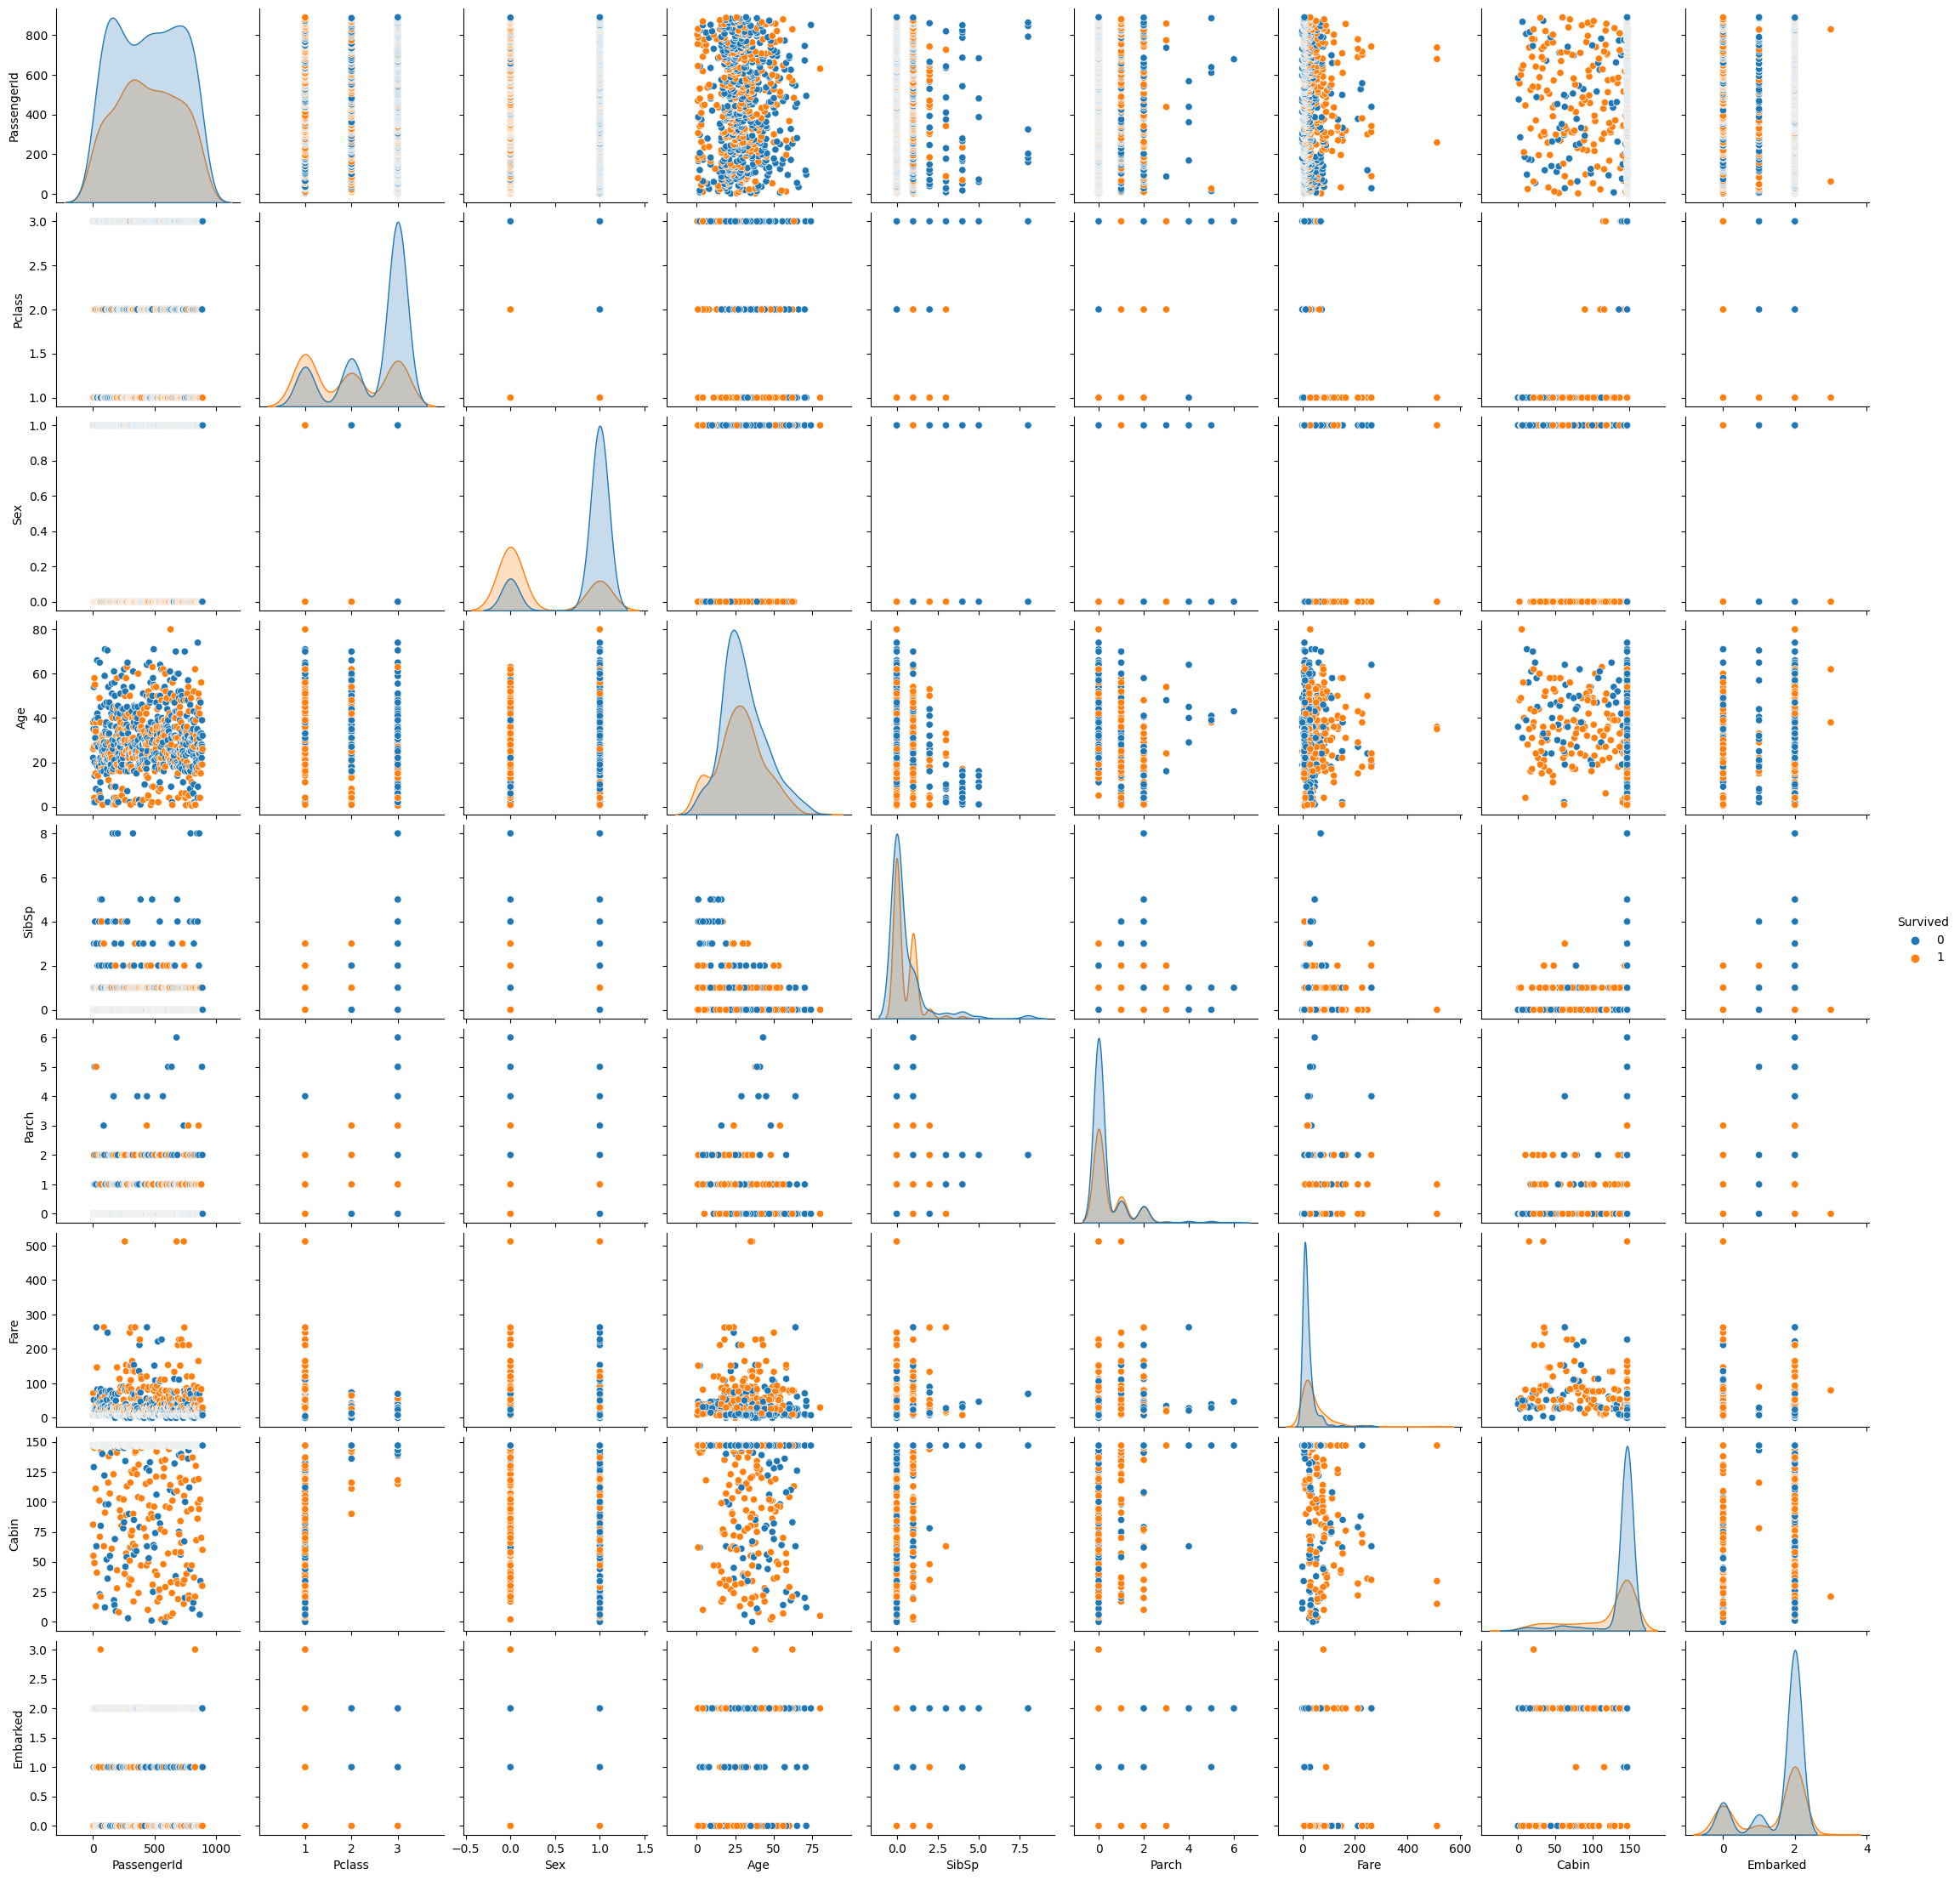

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train, hue='Survived', diag_kind='kde')
plt.show()

Survivors were mostly younger and paid higher fares.

Passengers in higher classes (Pclass = 1) survived more.

Gender (Sex) has strong separation.

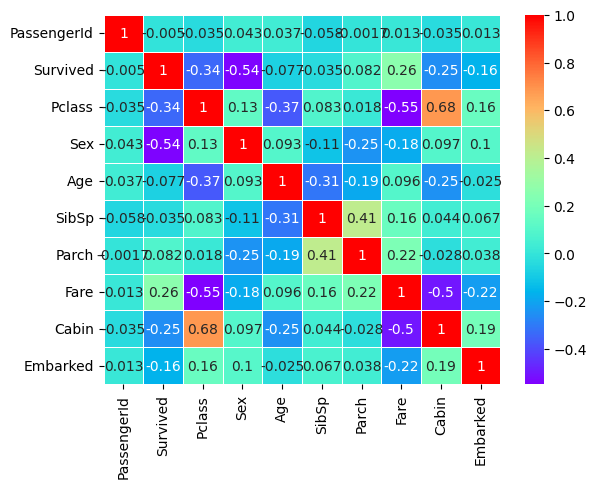

In [48]:
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths=0.5)
plt.show()

Survival is positively correlated with Fare and being female (Sex).

Pclass is negatively correlated with Survival (lower class, lower chance).

SibSp and Parch have weak correlations.

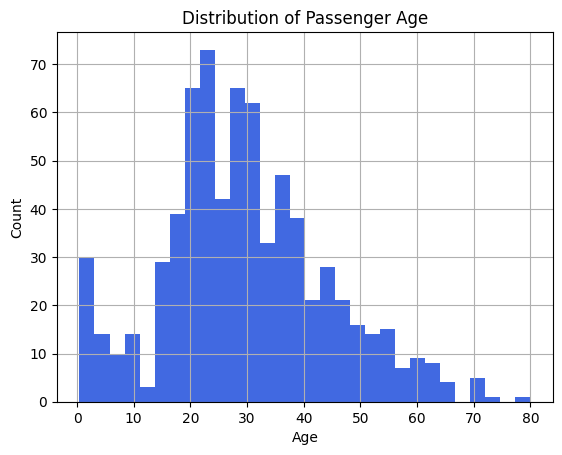

In [51]:
train['Age'].hist(bins=30, color='royalblue')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Most passengers are between 20 and 40 years old.

There are fewer children and older adults.

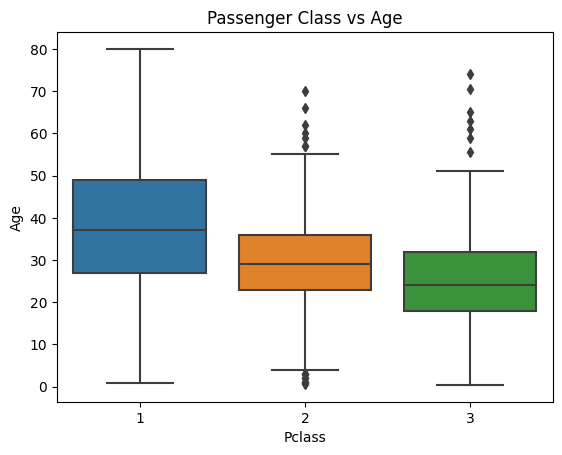

In [53]:
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Passenger Class vs Age')
plt.show()

1st class passengers are older on average.

3rd class passengers are generally younger.

Outliers exist in all classes.

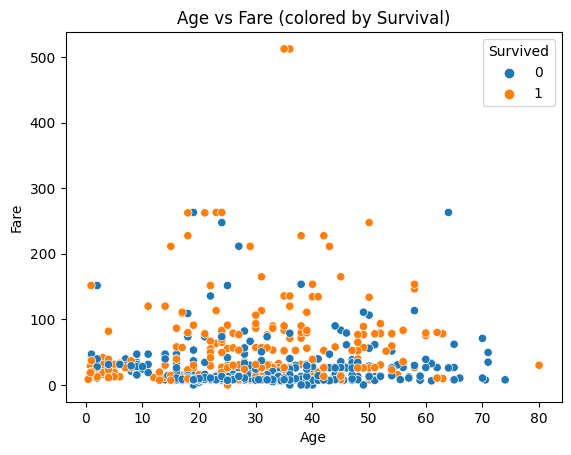

In [54]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title('Age vs Fare (colored by Survival)')
plt.show()

High-fare passengers had better survival chances.

Survivors cluster at higher Fare values.

Younger and mid-aged people are spread across all fare levels.